# Continuous Control

---




# DDPG Agent 

# Import necessary modules

In [1]:
# --- General NN and math libraries --- #
import numpy as np
import torch

# --- For Measuring performance --- #
from collections import deque
from statistics import mean, stdev
import matplotlib.pyplot as plt

# --- For Loading the environment --- #
from ENV import environment_loader

In [4]:
# --- For Loading the agent --- #
# We don't need to reimport the agent everytime we change one of it's values
%load_ext autoreload
%autoreload 2
from AGENT import DDPG_Agent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Environment
Environment is loaded with a helper function in ENV.py
The helper function returns the envrionment object, the state size and action size, the brain's name and how many agents there are in the environment

In [5]:

env, state_size, action_size, brain_name, num_agents = environment_loader("Reacher_Single/Reacher.exe", no_graphics = True)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00

# Train Agent

In [6]:
def DDPG_train(agent, env, max_t=100, num_episodes = 1, print_every=100, existing_score=[]):
    score_history = existing_score
    print("Initial Score History length: ", len(score_history))
    scores_deque = deque(maxlen=print_every)
    last_running_mean = float('-inf')

    for episode in range(num_episodes):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        agent.reset()                                          # reset the noise in the agent
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        score = 0

        for i in range(max_t):
            actions = agent.act(states[0])                     # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished

            agent.step(states[0], actions, rewards[0], next_states[0], dones[0])

            score += env_info.rewards[0]

            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        

        #returns_in_episode = np.mean(scores)
        returns_in_episode = score
        scores_deque.append(returns_in_episode)
        score_history.append(returns_in_episode)
        if episode > print_every:
            if mean(scores_deque) > last_running_mean:
                    print("")
                    print('Last {} was better, going to save it'.format(print_every))
                    torch.save(new_agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                    torch.save(new_agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                    last_running_mean = mean(scores_deque)

        print("\r", 'Total score (averaged over agents) {} episode: {} | \tAvarage in last {} is {}'.format(episode, returns_in_episode, print_every, np.mean(scores_deque)), end="")
        ##print("\r", 'Scores in {} episode: {}'.format(episode, scores), end="")
    

    return score_history

In [7]:
import os.path

filename="checkpoint_actor.pth"
path = ""

def fileAtLocation(filename, path):
    return os.path.exists(path + filename)

def load_previous(new_agent):
    loaded_agent = new_agent
    if fileAtLocation(filename, path):
        print("Found previous trained Agent, going to load them!")
        loaded_agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
        loaded_agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
    return loaded_agent

In [8]:
new_agent = DDPG_Agent(state_size, action_size, 1, actor_hidden = [128, 128], critic_hidden=[128, 128])



--- Agent Params ---
Going to train on cuda:0
Learning Rate:: Actor: 0.0001 | Critic: 0.0001
Replay Buffer:: Buffer Size: 100000 | Sampled Batch size: 100

Actor paramaters:: Input: 33 | Hidden Layers: [128, 128] | Output: 4
Critic paramaters:: Input: 33 | Hidden Layers: [132, 128] | Output: 1
Actor(
  (fc_in): Linear(in_features=33, out_features=128, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_out): Linear(in_features=128, out_features=4, bias=True)
)
Critic(
  (fc_in): Linear(in_features=33, out_features=128, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=132, out_features=128, bias=True)
  )
  (fc_out): Linear(in_features=128, out_features=1, bias=True)
)




In [9]:

score_history = DDPG_train(new_agent, env, max_t = 1001, num_episodes = 500)
#print(score_history)

 100 is 15.752899647895246
Last 100 was better, going to save it
 Total score (averaged over agents) 204 episode: 23.23999948054552 | 	Avarage in last 100 is 15.90219964455813
Last 100 was better, going to save it
 Total score (averaged over agents) 205 episode: 22.519999496638775 | 	Avarage in last 100 is 16.017499641980976
Last 100 was better, going to save it
 Total score (averaged over agents) 206 episode: 24.89999944344163 | 	Avarage in last 100 is 16.129199639484288
Last 100 was better, going to save it
 Total score (averaged over agents) 207 episode: 14.709999671205878 | 	Avarage in last 100 is 16.211899637635796
Last 100 was better, going to save it
 Total score (averaged over agents) 208 episode: 19.929999554529786 | 	Avarage in last 100 is 16.33589963486418
Last 100 was better, going to save it
 Total score (averaged over agents) 209 episode: 21.989999508485198 | 	Avarage in last 100 is 16.430599632747473
Last 100 was better, going to save it
 Total score (averaged over agent

# Display and Save results

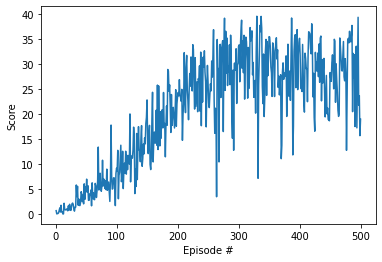

In [13]:
# print(score_history)
# print(len(score_history))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(score_history)+1), score_history)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
#plt.savefig("")

In [12]:
import csv
parsed = [float(i) for i in score_history]
with open("last_score_128_128.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(score_history)

# Continue last saved run
The next to cells 
- Import the scores of the last run
- If we saved weights of the Neural Net load those
- Continue training from last place

In [ ]:
import csv

with open('last_score.csv', newline='') as f:
    reader = csv.reader(f)
    read_score_history = list(reader)[0]

In [ ]:
new_agent = load_previous(new_agent)

In [ ]:
new_score_history = DDPG_train(new_agent, env, max_t = 1001, num_episodes = 150, existing_score=read_score_history)

In [ ]:
# print(new_score_history)
parsed = [float(i) for i in new_score_history]
# print(parsed)
# print(len(new_score_history))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(parsed)+1), parsed)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
with open("last_score.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(parsed)

# See how the agent performs

In [ ]:
%load_ext autoreload
%autoreload 2
from AGENT import DDPG_Agent

new_agent = DDPG_Agent(state_size, action_size, 5)
new_agent = load_previous(new_agent)

In [ ]:
def DDPG_eval(agent, env, max_t=100):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    episode_length = 0                                     # measure number of steps allowed before done flag
    for i in range(max_t):
        # actions = np.random.randn(num_agents, action_size) # select an action (for each agent); randomly!
        actions =  np.random.randn(num_agents, action_size) if agent is None else agent.act(states[0]) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to the environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        episode_length +=1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode length is {}'.format(episode_length))
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [ ]:
DDPG_eval(new_agent, env, max_t = 100000000000)

In [ ]:
env.close()